<center><font size='40'>Matplotlib & Seaborn Plotting</font><center>

In [15]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd

# Matplotlib

##  Styles

In [2]:
import numpy as np

#generate random data points
yA, yB = np.random.randn(20), 0.5+np.random.randn(20)
xA, xB = np.random.normal(1, 0.1, len(yA)), np.random.normal(3, 0.1, len(yB))

In [3]:
#available plotting styles/themes
print(plt.style.available)

['_classic_test', 'seaborn-pastel', 'dark_background', 'seaborn-bright', 'seaborn-white', 'seaborn-deep', 'seaborn-dark-palette', 'grayscale', 'seaborn-talk', 'seaborn-whitegrid', 'classic', 'fast', 'tonu_dark', 'ggplot', 'seaborn-muted', 'bmh', 'seaborn', 'fivethirtyeight', 'seaborn-poster', 'seaborn-notebook', 'seaborn-ticks', 'seaborn-darkgrid', 'seaborn-colorblind', 'seaborn-dark', 'tableau-colorblind10', 'seaborn-paper', 'Solarize_Light2']


Created my own style "tonu_dark'. A .mplstyle file must be created into /home/tonu_ilves/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib directory. There reside all the other style files aswell.

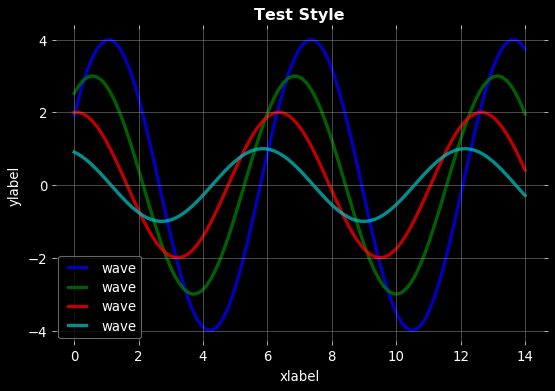

In [4]:
plt.style.use('tonu_dark')
def waves(n_waves, flip=1):
    x=np.linspace(0,14,100)
    cm = plt.cm.get_cmap('Set1')
    for i in range(1,n_waves+1):
        plt.plot(x,np.sin(x+0.5*i) * (n_waves+1-i)*flip, lw=3, alpha=0.75,label='wave')
    plt.margins(0.05)
    plt.title('Tonu Dark Style')
    plt.xlabel("xlabel")
    plt.ylabel('ylabel', )
    plt.legend()
waves(4)

# Seaborn

## Box Plot

In [17]:
house = pd.read_csv('data/iowa_house_prices/train.csv')
house.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd 
    
def box(df, x, y):
    """Seaborn box plot from DF.
    
    Parameters
    ----------
    df : DataFrame
        DataFrame with all the necessary x and y columns.
    x : str
        X axis column name.
    y : str
        Y axis column name.
    
    Returns
    -------
    None
    """
    #order classes by median valus and plot them descendingly
    my_order = df.groupby(by=x)[y].mean().sort_values(ascending=False).index
    
    plt.figure(figsize=(9, 5))
    sns.boxplot(x=x, y=y, data=df, order=my_order)
    
    plt.title('Training data swarms', fontsize=16, weight='bold')
    plt.xlabel(x, fontsize=16)
    plt.ylabel(y, fontsize=16)
    
    plt.show()

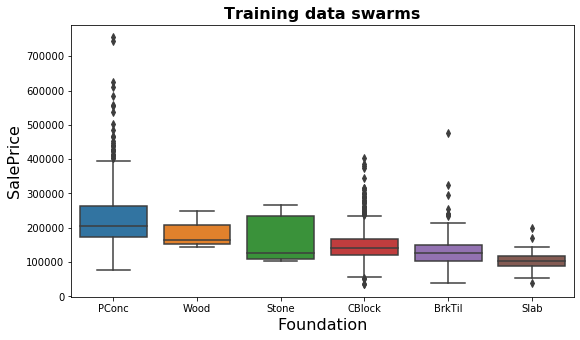

In [35]:
box(house, 'Foundation', 'SalePrice')

## Regression Plot

In [41]:
from IPython.display import clear_output
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns

# plots feature vs target with 1st & 2nd order correlation
# coeficients and fits
def reg_plot(df, x, y):
    """Scatter plot with 1st and optionally 2nd order regression fits
    with 95% confidence intervals.
    
    Parameters
    ----------
    df : DataFrame
        DataFrame with all the necessary x and y columns.
    x : str
        X axis column name.
    y : str
        Y axis column name.
    
    Returns
    -------
    None
    """
    
    clear_output() # clear stdout 
    
    #calculate Pearson corr coefs
    r_val1 = pearsonr(df[x], df[y]) 
    r_val2 = pearsonr(df[x]**2, df[y])
    
    #2nd order regression fr only if it improves the 1st order pearson r value
    if abs(r_val2[0]) > abs(r_val1[0]): 
        plt.figure(figsize=(8, 5))
        
        sns.regplot(x=x, y=y, data=df, 
                    line_kws={'color':'red','label':'order 1'})
        sns.regplot(x=x, y=y, data=df, order=2, label='order 2', 
                    color='green', scatter=None)
        
        plt.title('{} r_1={:.2f}, r_2={:.2f}'.format(x, r_val1[0], 
            r_val2[0]), fontsize=14, weight='bold')
        plt.xlabel(x, fontsize=14)
        plt.ylabel(y, fontsize=14)
        
        plt.legend()
        plt.show()
    else:
        plt.figure(figsize=(8, 5))
        
        sns.regplot(x=x, y=y, data=df, 
                    line_kws={'color':'red','label':'order 1'})
        
        plt.title('{} r_1={:.2f}'.format(x, r_val1[0]), 
                  fontsize=14, weight='bold')
        plt.xlabel(x, fontsize=14)
        plt.ylabel(y, fontsize=14)
        
        plt.legend()
        plt.show()

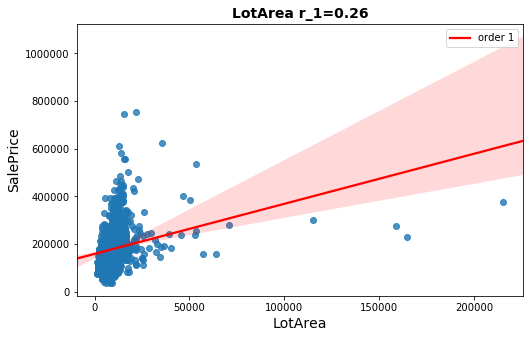

In [42]:
reg_plot(house, 'LotArea', 'SalePrice')